In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [62]:
#Buoc 1: Nhap Data va don Data
df = pd.read_excel('ecommerce retail.xlsx')

In [63]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [66]:
# Nhan thay gia tri am o UnitPrice
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [67]:
# Xoa gia tri am cua UnitPrice
df = df.drop(df[df['UnitPrice']<0].index)

In [68]:
# Kiem tra Quantity
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [69]:
# Xoa gia tri am cua Quantity
df = df.drop(df[df['Quantity']<0].index)

In [70]:
# Kiem tra duplicates
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [71]:
# Xoa duplicates
df.drop_duplicates(inplace=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [72]:
df.shape

(531283, 8)

In [73]:
# Kiem tra gia tri duplicates
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531283 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531283 non-null  object        
 1   StockCode    531283 non-null  object        
 2   Description  530691 non-null  object        
 3   Quantity     531283 non-null  int64         
 4   InvoiceDate  531283 non-null  datetime64[ns]
 5   UnitPrice    531283 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531283 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [75]:
# Kiem tra cac dong Null o CustomerID,Description va cac dong UnitPrice = 0
df[(df['Description'].isnull()) & (df['CustomerID'].isnull()) & (df['UnitPrice']==0.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
533712,581103,22689,NaN,4,2011-12-07 11:58:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [76]:
# Xoa cac dong Null o CustomerID,Description va cac dong UnitPrice = 0
df = df.drop(df[(df['Description'].isnull()) & (df['CustomerID'].isnull()) & (df['UnitPrice']==0.0)].index)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [77]:
# Buoc 2: Tao ca cot RFM
# Lay ngay 31-12-2011 lam moc
import datetime
current_date = datetime.datetime(2011,12,31)

# Tinh M - MoneytaryValue
df['TotalPay'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID de tinh R, F, M
df = df.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date- x.max()).days,
     'InvoiceNo':'count',
     'TotalPay':'sum'
     }
)

In [78]:
# Dat ten Recency, Frequency, MonetaryValue
df.rename(columns={'CustomerID':'CustomerID','InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)
df

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,182,4310.00
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40
...,...,...,...
18280.0,298,10,180.60
18281.0,201,7,80.82
18282.0,28,12,178.05


In [79]:
# Buoc 3: Phan rank 1-5 RFM
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)
df['R_score'] = pd.qcut(df['Recency'], q=5, labels=r_labels)
df['F_score'] = pd.qcut(df['Frequency'].rank(method='first'), q=5, labels=False) + 1
df['M_score'] = pd.qcut(df['MonetaryValue'], q=5, labels=m_labels)
df

,Recency,Frequency,MonetaryValue,R_score,F_score,M_score
CustomerID,,,,,,
12346.0,346,1,77183.60,1,1,5
12347.0,23,182,4310.00,5,5,5
12348.0,96,31,1797.24,2,3,4
12349.0,39,73,1757.55,4,4,4
12350.0,331,17,334.40,1,2,2
...,...,...,...,...,...,...
18280.0,298,10,180.60,1,1,1
18281.0,201,7,80.82,1,1,1
18282.0,28,12,178.05,5,1,1


In [80]:
# Tạo RFM_Score
df['RFM_Score'] = df['R_score'].astype(str) + df['F_score'].astype(str) + df['M_score'].astype(str)
df['RFM_Score'] = df['RFM_Score'].astype(int)
df

,Recency,Frequency,MonetaryValue,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,346,1,77183.60,1,1,5,115
12347.0,23,182,4310.00,5,5,5,555
12348.0,96,31,1797.24,2,3,4,234
12349.0,39,73,1757.55,4,4,4,444
12350.0,331,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,298,10,180.60,1,1,1,111
18281.0,201,7,80.82,1,1,1,111
18282.0,28,12,178.05,5,1,1,511


In [81]:
#Xu ly bang Segmentation
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name = 'Segmentation')
seg.columns = [col.replace(' ','_') for col in seg.columns]
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [82]:
# Tao danh sach Segment
seg['RFM_Score'] = seg['RFM_Score'].str.split(',')
seg = seg.explode('RFM_Score').reset_index(drop = True)
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [83]:
# Buoc 4: Gom nhom tung khach hang
join = df.merge(seg, how='left', on='RFM_Score')
join

,Recency,Frequency,MonetaryValue,R_score,F_score,M_score,RFM_Score,Segment
0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,23,182,4310.00,5,5,5,555,Champions
2,96,31,1797.24,2,3,4,234,At Risk
3,39,73,1757.55,4,4,4,444,Loyal
4,331,17,334.40,1,2,2,122,Hibernating customers
...,...,...,...,...,...,...,...,...
4334,298,10,180.60,1,1,1,111,Lost customers
4335,201,7,80.82,1,1,1,111,Lost customers
4336,28,12,178.05,5,1,1,511,New Customers
4337,24,756,2094.88,5,5,5,555,Champions


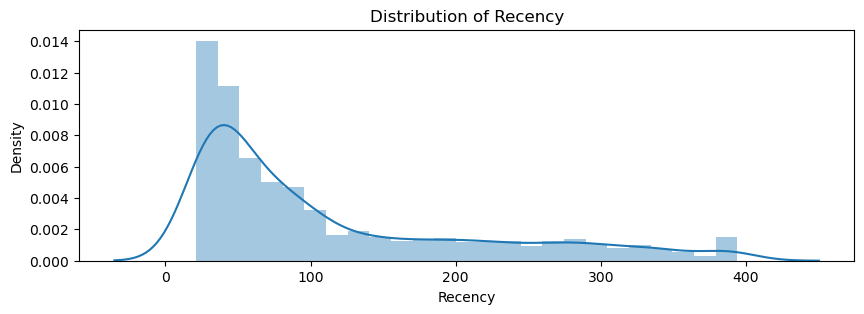

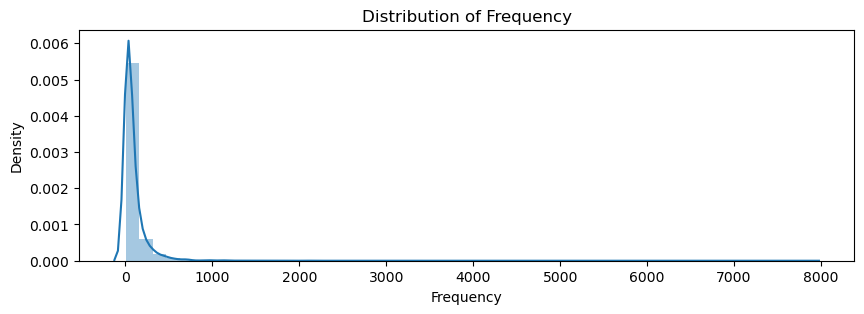

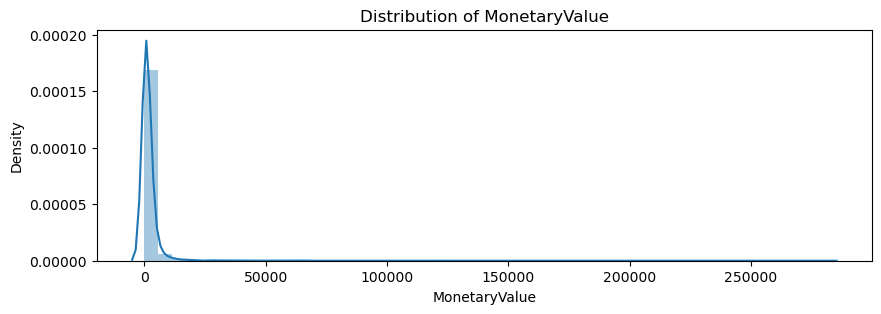

In [84]:
# Buoc 5: Visualize RFM
colnames = ['Recency', 'Frequency', 'MonetaryValue']

for col in colnames:
    fig, ax = plt.subplots(figsize=(10,3))
    sns.distplot(join[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [87]:
join[["Segment","Recency","Frequency", "MonetaryValue"]].groupby("Segment").agg(["mean","median","count"])


Recency                Frequency               \
                             mean median count        mean median count   
Segment                                                                   
About To Sleep         108.727749   92.0   191   21.575916   16.0   191   
At Risk                177.457275  151.0   433   81.519630   67.0   433   
Cannot Lose Them       239.965517  238.0    87   49.620690   11.0    87   
Champions               31.856070   29.0   799  286.873592  191.0   799   
Hibernating customers  170.076733  149.5   808   23.240099   22.0   808   
Lost customers         299.582547  297.0   424   11.679245    9.0   424   
Loyal                   58.691388   58.0   418  121.653110   97.0   418   
Need Attention          53.139738   50.0   229   57.148472   51.0   229   
New Customers           49.361842   45.0   304   11.055921   10.0   304   
Potential Loyalist      49.519531   45.0   512   61.943359   45.0   512   
Promising               37.641791   31.0   134   16.656716   17.0   134   

                      MonetaryValue                  
                               mean    median count  
Segment                                              
About To Sleep           284.323089   223.360   191  
At Risk                 1526.153164  1126.850   433  
Cannot Lose Them        3380.059667  1289.500    87  
Champions               6824.637472  3075.040   799  
Hibernating customers    403.484223   371.660   808  
Lost customers           176.590165   161.190   424  
Loyal                   2453.424019  1694.770   418  
Need Attention          1463.778122  1049.700   229  
New Customers            209.111579   186.120   304  
Potential Loyalist       585.413361   611.265   512  
Promising               2420.894552   712.840   134

In [88]:
# Một số chiến lược tiếp thị có thể được xác định cho các phân khúc khách hàng khác nhau. 
# Tôi đã xác định được 3 chiến lược cho các phân khúc khách hàng khác nhau.
# Những điều này có thể được đa dạng hóa và khách hàng có thể được theo dõi chặt chẽ hơn.

In [ ]:
# Potential Loyalist
# Những người trong nhóm này mua sắm lần cuối trung bình là 49 ngày trước. 
# Trung vị của nhóm là 45 nên không có nhiều sai lệch so với giá trị trung bình. 
# Do đó, con số này là nhất quán trong toàn nhóm. Trung bình có 61.94 đơn vị được mua và 585.41 đơn vị thanh toán được thực hiện. 
# Những người trong nhóm này có thể được đưa vào nhóm Khách hàng trung thành nếu được hỗ trợ. 

# Do đó, chúng có thể được giám sát chặt chẽ và sự hài lòng của khách hàng có thể tăng lên nhờ các cuộc gọi điện thoại trực tiếp. 
# Ngoài ra, các lựa chọn như miễn phí vận chuyển có thể được đưa ra để tăng mức lương trung bình được trả.
# Các chương trình khách hàng thân thiết cung cấp các ưu đãi như điểm hoặc phần thưởng khi tiếp tục mua hàng.
# Nhằm tăng mức độ trung thành của họ và khuyến khích họ chi tiêu nhiều hơn sẽ là chiến dịch hiệu quả nhất cho nhóm này.





In [ ]:
# Need Attention
# Những người trong nhóm này mua sắm lần cuối trung bình là 53 ngày trước. 
# Trung vị của nhóm là 50, do đó không có nhiều sai lệch so với giá trị trung bình. 
# Do đó, con số này là nhất quán trong toàn nhóm. 
# Trung bình có 57.14 đơn vị mua sắm được thực hiện và 1463.77 đơn vị thanh toán được thực hiện. 
# Nhóm này ít rủi ro hơn nhóm At-Risk. Ngày mua sắm cuối cùng là tương đối gần. 

# Ưu đãi đặc biệt có thể được thực hiện từ những sản phẩm có mức tiêu thụ nhanh hơn so với những sản phẩm mà khách hàng đó mua sắm. 
# Bằng cách này, thời gian ghé thăm trung bình của khách hàng có thể được rút ngắn.
# Đề xuất được cá nhân hóa đề xuất sản phẩm dựa trên lịch sử mua hàng gần đây của họ.
# Để khuyến khích họ thực hiện giao dịch mua khác,sẽ là chiến dịch hiệu quả nhất cho nhóm này.


In [ ]:
# At Risk
# Những người trong nhóm này mua sắm lần cuối trung bình là 177 ngày trước. 
# Trung vị của nhóm là 151, do đó không có nhiều sai lệch so với giá trị trung bình. 
# Vì vậy, có thể nói con số này thống nhất trong toàn tập đoàn. 
# Trung bình, 81.5 đơn vị mua sắm đã được thực hiện và 1379,64 đơn vị thanh toán đã được thực hiện. 
# Khoảng thời gian đã trôi qua kể từ lần mua cuối cùng của nhóm này là rất cao nên có thể bị mất khách hàng. 
# Cần tập trung vào những lý do có thể khiến những người này không mua sắm quá lâu. 
# Có thể có trường hợp khách hàng không hài lòng. 
# Trải nghiệm mua sắm của khách hàng có thể được kiểm tra bằng cách gửi bản khảo sát qua thư. 
# Nếu không có sự bất mãn thì người đó sẽ được nhắc nhở. 
# Các tùy chọn như mã giảm giá có thể được cung cấp để khuyến khích mua sắm lại.